# Part2 Writing a renderer (60 points)
Let’s write a simple software renderer that will transform an object’s 3D coordinates into a 2D picture that is viewed from a camera floating in space.

Define a 3D-cube as a numpy array with 8 corners in 3D space centered on [0,0,0] and edge length 2, that is, 2 of the 8 diagonally-opposite corners have the coordinates [1,1,1] and [-1,-1,-1]. In order to show this on screen, we will also have to define the edges of the cube, that is, a Nx2-array that specifies which of the 8 corners are connected, like so:

$$\mathrm{edges}=[(0,1),(0,2),(1,3),\cdots]$$

Create this array, too. Let’s first show the cube on-screen “as is”, that is, without any explicit camera. For this, use the helper-function show_3d below – the structure of the function should also help you to figure out the edges-array...

Insert code that shows the cube using the function show_3d.

Now, let's start by moving our cube in front of the camera. For this, we will first do a transformation according to the extrinsic parameters of the camera, that is, translation and rotation.

Here is the general definition of a rotation matrix around a vector u=[ux,uy,uz] with ||u||=1:

$$R=\begin{bmatrix}
 cos\theta+u_x^2(1-cos\theta)& u_xu_y(1-cos\theta)-u_zsin\theta & u_xu_z(1-cos\theta)+u_ysin\theta\\ 
 u_yu_x(1-cos\theta)+u_zsin\theta& cos\theta+u_y^2(1-cos\theta) & u_yu_z(1-cos\theta)-u_xsin\theta\\ 
u_zu_x(1-cos\theta)-u_ysin\theta & u_zu_y(1-cos\theta)+u_xsin\theta & cos\theta+u_z^2(1-cos\theta)
\end{bmatrix}$$

Make a function for creating such a matrix, given a direction and an angle. Note that angles are in radians!

Next, create a translation matrix using another helper function that you need to code. This means that you have to use homogenous coordinates – check the lecture slides again, how the matrix will have to look. Also remember to augment the rotation matrices accordingly!!

Note that it is incredibly important to specify the order in which you rotate and in which you translate! Here, we rotate first around the x-axis (u=[1,0,0]), then around the y-axis, then around the z-axis, and then we translate.

Create a function get_extrinsic_matrix(position,orientation) that returns the final 4x4 extrinsic matrix that can convert homogenous coordinates.

Next, write a function to_homogenous(points) that turns an array of points into homogenous coordinates [simply add a 1 as another dimension!]. Write another function from_homogenous(points) that converts an array of homogenous coordinates into proper 3D or 2D coordinates [by dividing the first 2 or 3 coordinates by the third or fourth element – see lecture slides!]. Note, that these functions should work for both 3D and 2D input!!

Using

$$\mathrm{camera\_position}=[0,0,-3]$$
$$\mathrm{camera\_orientation}=[0,0.1,0]$$

insert the necessary transformations to transform the cube into camera coordinates using the transformation from get_extrinsic_matrix and show the result using show_3d. You will need to convert back and forth from homogenous coordinates to do this...

Next, let’s set up the intrinsic projection, including the projection matrix itself. Restrict the intrinsic matrix to only the focal length, such that

$$K=\begin{bmatrix}
f & 0 & s_x\\ 
0 & f & s_y\\ 
0 & 0 & 1
\end{bmatrix}$$

Make a function get_intrinsic_matrix(f,s) that creates the full intrinsic transformation including the projection matrix 3x4 P, so that we get a 3x4 matrix overall. Again, this uses homogenous coordinates.

Using

$$f=0.6$$
$$s=(0.5,0.5)$$

transform the camera coordinates into projected coordinates. In order to use the helper-function show_2D from below, you will need to multiply the resulting coordinates by the size of the pixel canvas in pixels. So, we want to show an image of 200x200 pixels, you need to multiply all points by 200.

Insert the final code that projects the cube into an image and plot the result using show_2d. Again, conversion between homogenous coordinates has to be used...

# Setup

In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

from math import atan, sin, cos
# you are only allowed to import numpy # for further math calculations!! 
import numpy as np

# We import ipywidgets for interactive tools
from ipywidgets import IntSlider, interact, FloatSlider

# Functions

We define 7 functions to capture a object(2D or 3D) in 2D plane as follows:

- show_3d
- show_2d
- get_extrinsic_matrix
- get_intrinsic_matrix
- to_homogenous
- from_homogenous
- take_picture

In [8]:
def show_3d(vertices, edges):
    """
    Show 3D image of a object
    
    Arguments
    ---------
    vertices: vertices of a object
    edges: edges of a object
    
    """
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for idx, edge in enumerate(edges):
        p1 = vertices[edge[0]] 
        p2 = vertices[edge[1]] 
        ax.plot([p1[0], p2[0]],
                [p1[1], p2[1]],
                [p1[2], p2[2]])        
            
    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5) 
    ax.set_zlim(-5, 5) 
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_zlabel('z')
    plt.show()

def show_2d(vertices: list, edges: list, size: list = (200,200)): 
    """
    Show 2D image of a object
    
    Arguments
    ---------
    vertices: vertices of a object (list)
    edges: edges of a object (list)
    size: maximum range of x and y axis (list, default = (200,200))
    
    """
    
    fig = plt.figure()
    ax = fig.gca()
    for idx, edge in enumerate(edges):
        p1 = vertices[edge[0]] 
        p2 = vertices[edge[1]] 
        ax.plot([p1[0], p2[0]],
                [p1[1], p2[1]])
        
    ax.set_xlim(0, size[0]) 
    ax.set_ylim(0, size[1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()
    

def to_homogenous(points: list):
    """
    Convert coordinates of a object into homogenous coordinates of a object. The object can be 2D or 3D.
    
    Argument
    --------
    points: coordinates of a object (list)
    
    Return
    ------
    result: homogenous coordinates of a object
    
    """
    result = np.hstack([points, np.ones((points.shape[0], 1))])
    
    return result
        
    
def from_homogenous(points: list):
    """
    Convert homogenous coordinates of a object into origin coordinates of a object. The object can be 2D or 3D.
    
    Argument
    --------
    points: homogenous coordinates of a object (list)

    Return
    ------
    result: origin coordinates of a object
    
    """
    result = np.array(list(map(lambda x: np.divide(x[:-1], x[-1]), points)))
    
    return result



def get_extrinsic_matrix(position: list = [0.,0.,-3.], 
                         orientation: list = [0.,0.1,0.]):
    """
    Get a extrinsic matrix to rotate a camera direction
    
    Arguments
    ---------
    position: a camera position in world coordinates (list, default = [0., 0., -3.])
    orientation: a orientation of a camera (list, default = [0., 0.1, 0.])
    theta: a redian for a rotation matrix (float, default = 0.)
    
    Returns
    -------
    R: a rotation matrix
    extrinsic_translate: a matrix multiplication result of extrinsic matrix and translate matrix
    
    """
    def rotation_matrix(u, r):
        # define u vector
        c = cos(r)
        s = sin(r)

        # define R matrix
        R = np.array([[c + (u[0]**2)*(1-c), u[0]*u[1]*(1-c) - u[2]*s, u[0]*u[2]*(1-c) + u[1]*s],
                      [u[1]*u[0]*(1-c) + u[2]*s, c + (u[1]**2)*(1-c), u[1]*u[2]*(1-c) - u[0]*s],
                      [u[2]*u[0]*(1-c) - u[1]*s, u[2]*u[1]*(1-c) + u[0]*s, c + (u[2]**2)*(1-c)]])

        return R
    
    # get a rotation matrix
    Rx = rotation_matrix(u=[1,0,0], r=orientation[0])
    Ry = rotation_matrix(u=[0,1,0], r=orientation[1])
    Rz = rotation_matrix(u=[0,0,1], r=orientation[2])
    
    R = np.matmul(Rz, Ry)
    R = np.matmul(R, Rx)
    
    # extrinsic matrix
    extrinsic_matrix = np.identity(n=4)
    extrinsic_matrix[:-1, :-1] = R
    
    # translate matrix
    translate_matrix = np.identity(n=4)
    translate_matrix[:-1,-1] = -np.array([position])
    
    # matrix multiplication of extrinsic matrix and translate matrix
    extrinsic_translate = np.matmul(translate_matrix, extrinsic_matrix)
    
    return extrinsic_translate

def get_intrinsic_matrix(f: float = 0.6, s: tuple = (0.5, 0.5)):
    """
    Get intrinsic matrix of a camera
    
    Arguments
    ---------
    f: a focal length from a camera to a object (float, default = 0.6)
    s: principal points (tuple, default = (0.5, 0.5))
    
    Return
    ------
    intrinsic_projection: a matrix multiplication result of intrinsic matrix and projection matrix
    
    """
    
    # intrinsic matrix
    intrinsic_matrix = np.array(
        [[f, 0, s[0]],
         [0, f, s[1]],
         [0, 0,   1]]
    )
    
    # make projection matrix
    projection_matrix = np.zeros(shape=(3,4))
    projection_matrix[:,:-1] = np.identity(3)
    
    # matrix multiplication of intrinsic matrix and projection matrix
    intrinsic_projection = np.matmul(intrinsic_matrix, projection_matrix)
    
    return intrinsic_projection


def take_picture(l: float = 2,
                 f: float = 0.6, 
                 cx: float = 0., 
                 cy: float = 0., 
                 cz: float = -3., 
                 ox: int = 0, 
                 oy: int = 0.1, 
                 oz: int = 0):
    """
    Get a image from a object. The object can be 2D or 3D.
    
    Arguments
    ---------
    l: a length of the cude
    f: a focal length from a camera to a object (float, default = 0.6)
    cx: a x-axis of a camera (float, default = 0.) 
    cy: a y-axis of a camera (float, default = 0.)
    cz: a z-axis of a camera (float, default = -3.)
    ox: orientation of x axis (int, default = 0)
    oy: orientation of y axis (int, default = 0.1)
    oz: orientation of z axis (int, default = 0)
    
    """
    
    # define a cube vertices and edges
    vertices = np.array([[ l/2, l/2, l/2],[ l/2, l/2,-l/2],
                         [ l/2,-l/2, l/2],[-l/2, l/2, l/2],
                         [ l/2,-l/2,-l/2],[-l/2,-l/2, l/2],
                         [-l/2, l/2,-l/2],[-l/2,-l/2,-l/2]])

    edges = []
    for i in range(len(vertices)):
        edges.extend([[i, r] for r in range(i+1, len(vertices)) if np.sqrt(((vertices[i]-vertices[r])**2).sum())==l])
    
    # define camera parameters
    position = np.array([cx, cy, cz]) # default = [0,0,-3]
    orientation = np.array([ox, oy, oz]) # default = [0,0.1,0]
    
    # define a focal length and principal points
    f = f
    s = (0.5, 0.5)

    # get extrinsic and intrinsic parameters
    extrinsic_translate = get_extrinsic_matrix(position = position, 
                                               orientation = orientation)
    intrinsic_projection = get_intrinsic_matrix(f = f, s = s)
    
    # parameter result
    param_result = np.matmul(intrinsic_projection, extrinsic_translate)
    
    # add homogenous into the cube coordinate
    h_vertices = to_homogenous(points = vertices)
    
    # take a picture
    picture_vertices = np.matmul(param_result, h_vertices.T).T
    picture = from_homogenous(points = picture_vertices)
    
    # show the cube
    rotated_cube = from_homogenous(points = np.matmul(extrinsic_translate, h_vertices.T).T)
    
    # make figure
#     show_3d(vertices = rotated_cube, 
#             edges = edges)
    
    # show the picture
    show_2d(vertices = picture * 200, 
            edges = edges, 
            size = (200,200))

## Answer

This is a answer given values as follows:
- focal length(f): 0.6
- prinsipal point(s): (0.5, 0.5)
- camera position: (0, 0, -3)
- camera orientation: (0, 0.1, 0)


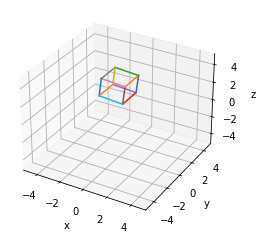

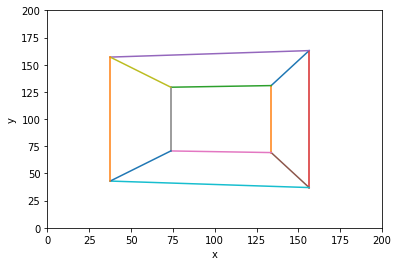

In [3]:
%matplotlib inline
take_picture(l  = 2,   # length of the cube
             f  = 0.6, # focal length
             cx = 0,   # camera point x axis
             cy = 0,   # camera point y axis
             cz = -3,  # camera point z axis
             ox = 0,   # camera orientation x axis
             oy = 0.1, # camera orientation y axis
             oz = 0    # camera orientation z axis
) 

In [9]:
%matplotlib inline
l_slider = FloatSlider(value=2, min=1, max=5, step=0.1, description='length')
f_slider = FloatSlider(value=0.6, min=0, max=2, step=0.1, description='focal length')
cx_slider = FloatSlider(value=0, min=-6, max=3, step=0.1, description='camera x')
cy_slider = FloatSlider(value=0, min=-6, max=3, step=0.1, description='camera y')
cz_slider = FloatSlider(value=-3, min=-6, max=3, step=0.1, description='camera z')
ox_slider = FloatSlider(value=0, min=-1, max=1, step=0.1, description='orientation x')
oy_slider = FloatSlider(value=0.1, min=-1, max=1, step=0.1, description='orientation y')
oz_slider = FloatSlider(value=0, min=-1, max=1, step=0.1, description='orientation z')

interact(take_picture,              
         l  = l_slider,  # a length of the cude
         f  = f_slider,  # focal length
         cx = cx_slider, # camera point x axis
         cy = cy_slider, # camera point y axis
         cz = cz_slider, # camera point z axis
         ox = ox_slider, # camera orientation x axis
         oy = oy_slider, # camera orientation y axis
         oz = oz_slider, # camera orientation z axis
)

interactive(children=(FloatSlider(value=2.0, description='length', max=5.0, min=1.0), FloatSlider(value=0.6, d…

<function __main__.take_picture(l: float = 2, f: float = 0.6, cx: float = 0.0, cy: float = 0.0, cz: float = -3.0, ox: int = 0, oy: int = 0.1, oz: int = 0)>

# Bonus (20 points)

Insert code that shows an open tube of similar proportions [you will of course not be able to show the “round” tube with this code – so approximate the round base of the tube with a few lines]!

In [5]:
def draw_3d_polygon(n: int, radius: float, length: float):
    """
    Draw a polygon tube
    
    Argument
    --------
    n: the number of vertices (float)
    radius: a radius of polygon (float)
    length: a length of a polygon tube (float)
    
    """
    # create polygon coordinate
    center_degree = 360 / n
    
    vertices1 = np.array([(radius * sin((center_degree * i) * np.pi / 180), length, radius * cos((center_degree * i) * np.pi / 180)) for i in range(n)])
    vertices2 = np.array([(radius * sin((center_degree * i) * np.pi / 180), -length, radius * cos((center_degree * i) * np.pi / 180)) for i in range(n)])

    edges = [[i,i+1] for i in range(n)]
    edges[-1][1] = 0
    
    # show polygon
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d') 
    for edge in edges:
        p1 = vertices1[edge[0]] 
        p2 = vertices1[edge[1]]
        
        p3 = vertices2[edge[0]] 
        p4 = vertices2[edge[1]]
        
        for ps, pe in [(p1,p2),(p3,p4),(p1,p3)]:
            ax.plot([ps[0], pe[0]],
                    [ps[1], pe[1]],
                    [ps[2], pe[2]], color='brown') 
            
    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5) 
    ax.set_zlim(-5, 5) 
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_zlabel('z')

## Answer

This is a example given values as follows:
- n: 20 
- length: 3
- raduis: 2

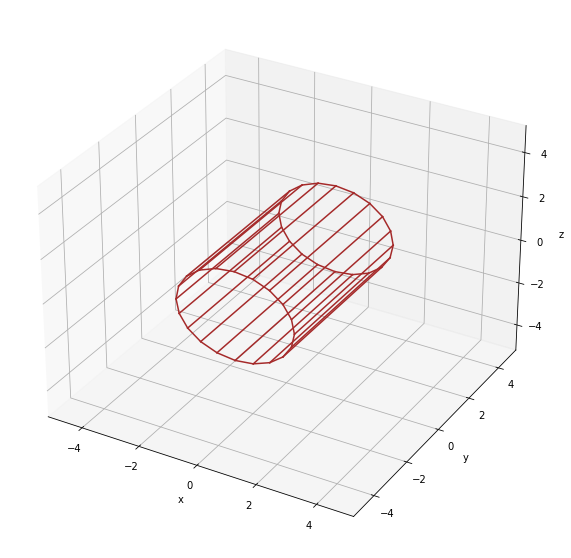

In [6]:
%matplotlib inline
draw_3d_polygon(n=20, length=3, radius=2)

This is a interactive example 

In [7]:
%matplotlib inline
r = FloatSlider(value=1, min=1, max=10, step=0.1)
l = FloatSlider(value=1, min=1, max=10, step=0.1)
n = IntSlider(value=3, min=3, max=100, step=1)
interact(draw_3d_polygon, n=n, length=l, radius=r)

interactive(children=(IntSlider(value=3, description='n', min=3), FloatSlider(value=1.0, description='radius',…

<function __main__.draw_3d_polygon(n: int, radius: float, length: float)>